In [ ]:
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
#sparse_categorical_crossentropy/categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
hist = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

# 확인: hist.history의 키 확인
print(hist.history.keys())

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1991 - accuracy: 0.9415 - val_loss: 0.1144 - val_accuracy: 0.9646
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0802 - accuracy: 0.9753 - val_loss: 0.0819 - val_accuracy: 0.9754
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0683 - val_accuracy: 0.9802
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0363 - accuracy: 0.9880 - val_loss: 0.0747 - val_accuracy: 0.9797
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9801
테스트 정확도: 0.9800999760627747
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


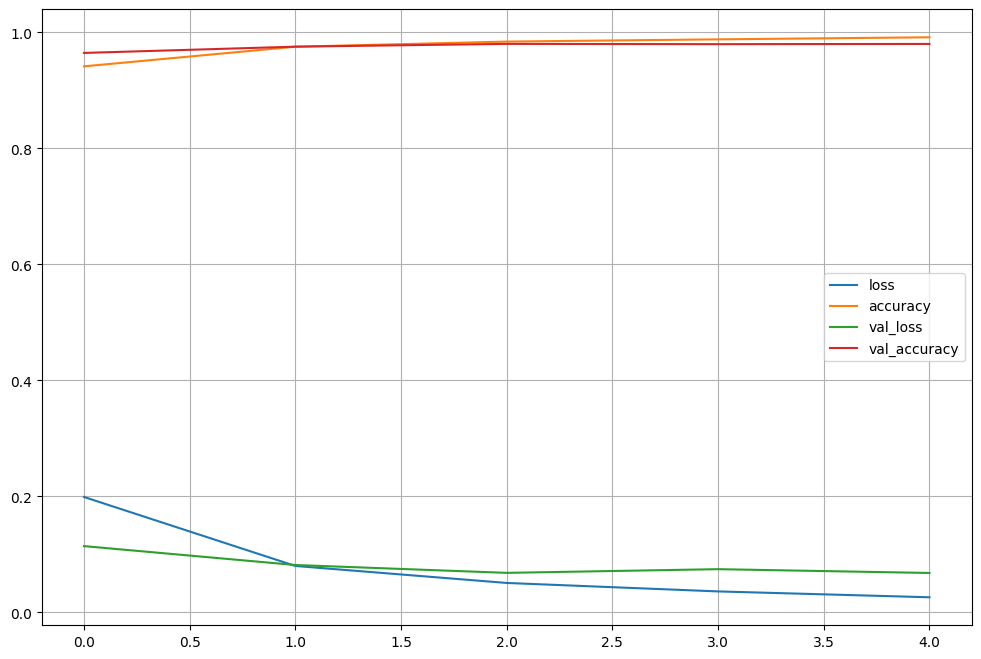

In [ ]:
#7. 그래프로보기
import matplotlib.pyplot as plt


plot_target = ['loss', 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
plt.legend()
plt.grid()
plt.show()

In [ ]:
#8. 테스트

score = model.evaluate(x_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')

313/313 [==============================] - 2s 5ms/step - loss: 0.0681 - accuracy: 0.9801
Test Loss : 0.06812598556280136
Test Accuracy  : 0.9800999760627747


In [ ]:
import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result,  axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
#10. 틀린데이터 수 확인

wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

199

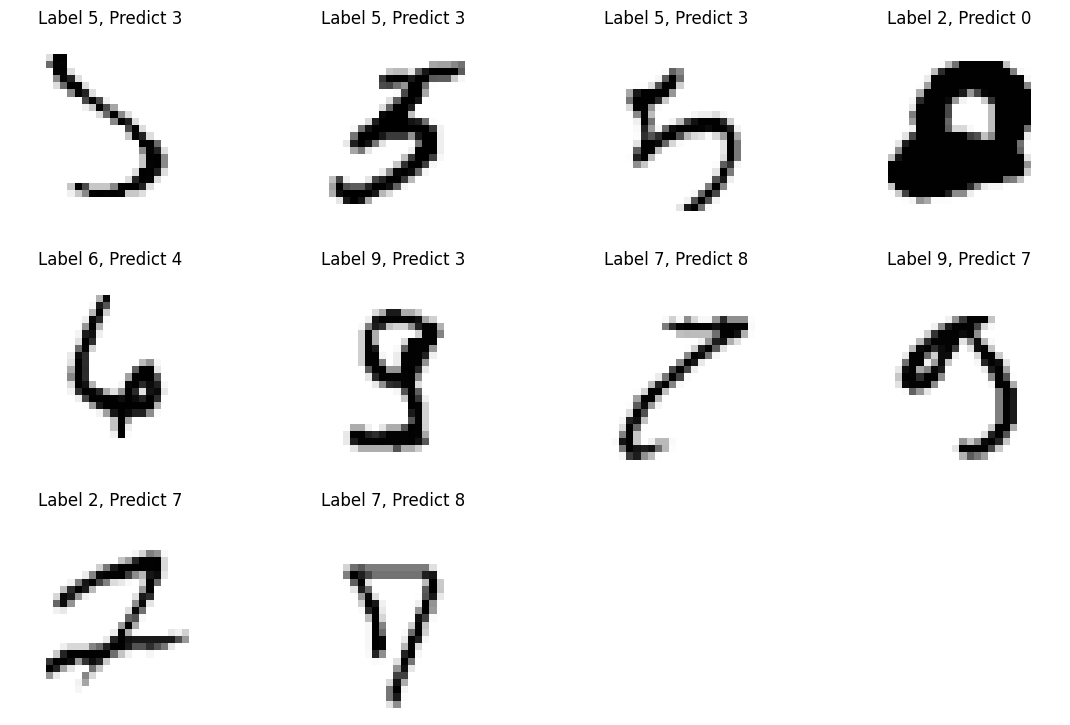

In [ ]:
#11. 틀린데이터 10개 그려보기

import random

samples = random.choices(population=wrong_result, k =10)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(x_test[n].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label ' + str(y_test[n]) + ', Predict ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

In [ ]:
# 12. 모델 저장
model.save('MNIST_ANN_model.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time #모델 컴파일 시간 확인

#1. 데이터 불러오기
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28 ,28, 1))
X_test = X_test.reshape((10000, 28 ,28, 1))

#2. 모델구성
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5),
                  strides=(1, 1),
                  padding='same',
                  activation='relu',
                  input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2),
                        strides=(2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

#3. 모델컴파일
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
start_time = time.time()

#4. 모델 훈련
hist = model.fit(X_train, y_train,
                 epochs=5,
                 verbose = 1,
                 validation_data=(X_test, y_test))
print(f'Fit Time :{time.time() - start_time}')

#5. 모델 정확도
test_loss, test_acc = model.evaluate(X_test, y_test)
print('테스트 정확도:', test_acc)

11490434/11490434 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                         

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time #모델 컴파일 시간 확인

#1. 데이터 불러오기
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28 ,28, 1))
X_test = X_test.reshape((10000, 28 ,28, 1))

#2. 모델구성
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5),
                  strides=(1, 1),
                  padding='same',
                  activation='relu',
                  input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2),
                        strides=(2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

#3. 모델컴파일
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
start_time = time.time()

#4. 모델 훈련
hist = model.fit(X_train, y_train,
                 epochs=5,
                 verbose = 1,
                 validation_data=(X_test, y_test))
print(f'Fit Time :{time.time() - start_time}')

#5. 모델 정확도
test_loss, test_acc = model.evaluate(X_test, y_test)
print('테스트 정확도:', test_acc)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 1000)             

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

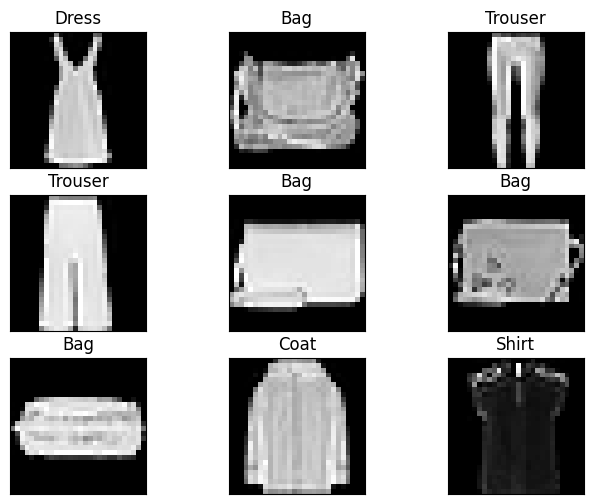

In [ ]:
import numpy as np

class_names =['T-shirp/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

samples = np.random.randint(len(X_train), size = 9)

plt.figure(figsize = (8,6))
for i , idx in enumerate(samples):
  plt.subplot(3,3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[idx], cmap ='gray')
  plt.title(class_names[y_train[idx]])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.3, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)


(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


In [ ]:
import numpy as np

X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

print(np.max(X_train), np.min(X_train))

1.0 0.0


In [ ]:
X_train = (X_train.reshape((-1,28*28)))
X_val = (X_val.reshape((-1,28*28)))
X_test = (X_test.reshape((-1,28*28)))

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(42000, 784) (42000,)
(18000, 784) (18000,)
(10000, 784) (10000,)


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

y_train_oh[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(784,)))
  model.add(layers.Dense(64, activation ='relu',input_shape = (784,)))
  model.add(layers.Dense(32, input_shape = (784,)))
  model.add(layers.Dense(10, activation ='softmax'))
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
EPOCHS = 100
BATCH_SIZE =64

history = model.fit(X_train, y_train_oh,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = .2)

Epoch 1/100
525/525 [==============================] - 3s 4ms/step - loss: 0.6029 - acc: 0.7878 - val_loss: 0.4637 - val_acc: 0.8380
Epoch 2/100
525/525 [==============================] - 2s 4ms/step - loss: 0.4287 - acc: 0.8476 - val_loss: 0.4159 - val_acc: 0.8513
Epoch 3/100
525/525 [==============================] - 3s 5ms/step - loss: 0.3863 - acc: 0.8623 - val_loss: 0.3934 - val_acc: 0.8590
Epoch 4/100
525/525 [==============================] - 2s 4ms/step - loss: 0.3595 - acc: 0.8701 - val_loss: 0.3725 - val_acc: 0.8626
Epoch 5/100
525/525 [==============================] - 3s 5ms/step - loss: 0.3410 - acc: 0.8766 - val_loss: 0.3557 - val_acc: 0.8683
Epoch 6/100
525/525 [==============================] - 2s 4ms/step - loss: 0.3226 - acc: 0.8829 - val_loss: 0.3549 - val_acc: 0.8713
Epoch 7/100
525/525 [==============================] - 2s 5ms/step - loss: 0.3132 - acc: 0.8862 - val_loss: 0.3482 - val_acc: 0.8738
Epoch 8/100
525/525 [==============================] - 2s 5ms/step - 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize = (16,8))

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label='Val Accuracy')
  plt.legend()

plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred[:1]

313/313 [==============================] - 1s 2ms/step


array([[3.3509918e-18, 2.8485911e-22, 4.2697114e-19, 1.7320982e-09,
        6.1209152e-25, 9.1775081e-11, 1.3154515e-23, 1.1910245e-06,
        1.6032062e-17, 9.9999881e-01]], dtype=float32)

In [ ]:
y_pred_argmax = np.argmax(y_pred, axis = 1)
y_pred_argmax[:10]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

<Figure size 1600x600 with 0 Axes>

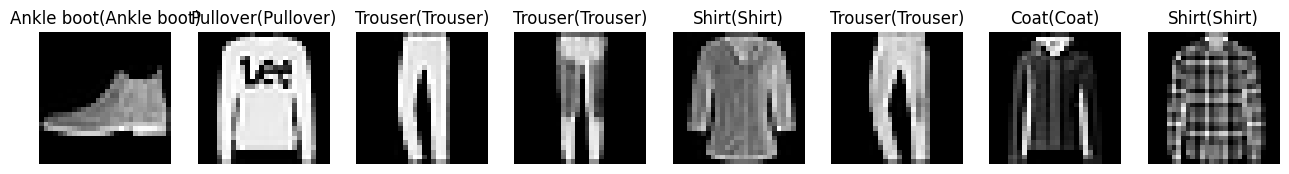

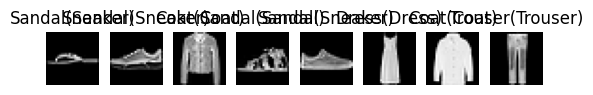

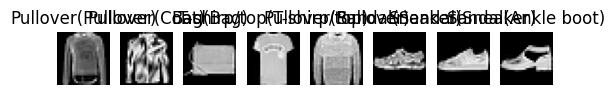

In [ ]:
n_rows = 3
n_cols = 8

plt.figure(figsize = (n_cols *2, n_rows *2))
plt.figure(figsize = (n_cols *2, n_rows *2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_test[index].reshape(28,28), cmap = 'gray')
    #plt.imshow(X_test[index], cmap = 'gray')
    plt.axis('off')
    plt.title(f'{class_names[y_pred_argmax[index]]}({class_names[y_test[index]]})')

  plt.show()

In [ ]:
def build_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(784,)))
  model.add(layers.Dense(64, activation ='relu',input_shape = (784,)))
  model.add(layers.BatchNormalization())  # Batch Normalization
  model.add(layers.Dropout(0.2))  # Dropout for regularization
  model.add(layers.Dense(32, input_shape = (784,)))
  model.add(layers.BatchNormalization())  # Batch Normalization
  model.add(layers.Dropout(0.2))  # Dropout for regularization
  model.add(layers.Dense(10, activation ='softmax'))
  return model




In [ ]:
model = build_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_8 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_9 (Bat  (None, 32)                128       
 chNormalization)                                     

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#  Early stopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               verbose=1,
                               restore_best_weights=True)

In [ ]:
EPOCHS = 100
BATCH_SIZE =128

history = model.fit(X_train, y_train_oh,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = .2,
                    callbacks=[early_stopping]
                    )

Epoch 1/100
263/263 [==============================] - 4s 9ms/step - loss: 0.7420 - acc: 0.7562 - val_loss: 0.5504 - val_acc: 0.8289
Epoch 2/100
263/263 [==============================] - 1s 6ms/step - loss: 0.5155 - acc: 0.8255 - val_loss: 0.4875 - val_acc: 0.8302
Epoch 3/100
263/263 [==============================] - 2s 6ms/step - loss: 0.4645 - acc: 0.8409 - val_loss: 0.4220 - val_acc: 0.8468
Epoch 4/100
263/263 [==============================] - 1s 6ms/step - loss: 0.4351 - acc: 0.8460 - val_loss: 0.3872 - val_acc: 0.8612
Epoch 5/100
263/263 [==============================] - 1s 6ms/step - loss: 0.4111 - acc: 0.8539 - val_loss: 0.3917 - val_acc: 0.8574
Epoch 6/100
263/263 [==============================] - 1s 5ms/step - loss: 0.3981 - acc: 0.8561 - val_loss: 0.3944 - val_acc: 0.8568
Epoch 7/100
263/263 [==============================] - 1s 6ms/step - loss: 0.3957 - acc: 0.8591 - val_loss: 0.3774 - val_acc: 0.8623
Epoch 8/100
263/263 [==============================] - 2s 8ms/step - 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize = (16,8))

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label='Val Accuracy')
  plt.legend()

plt.show()

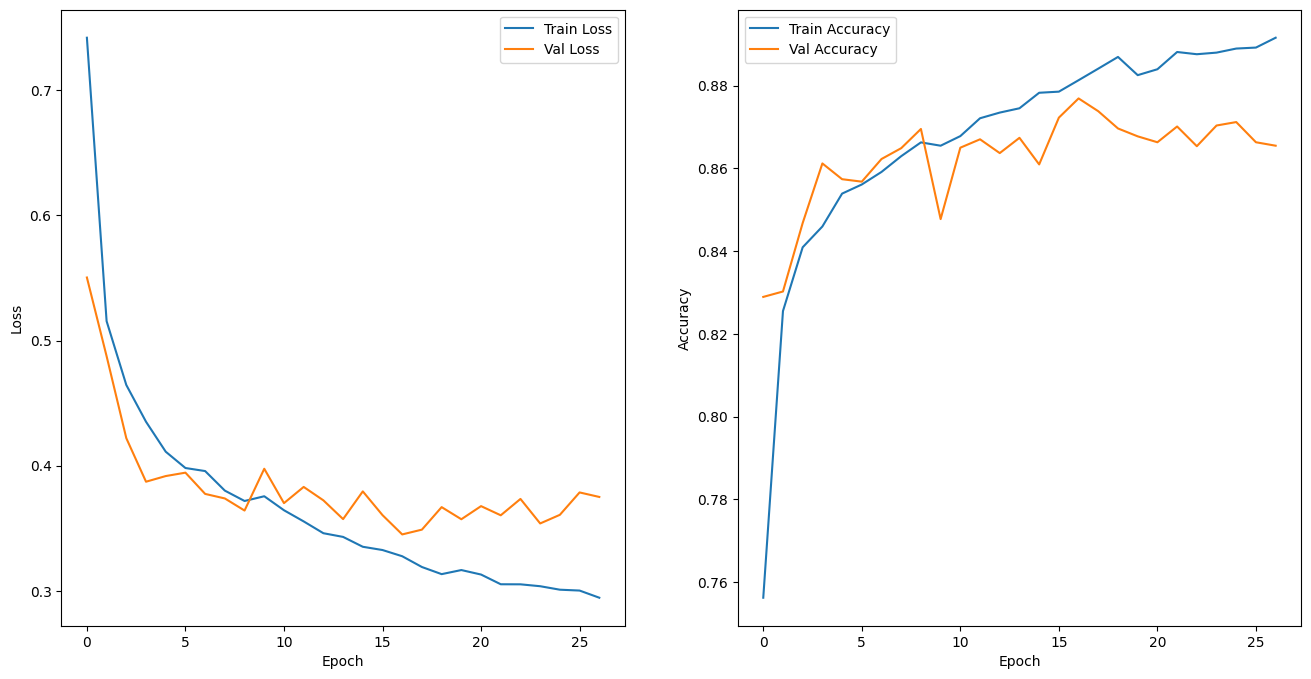

In [ ]:
plot_history(history)

In [ ]:
!unzip -qq "/content/shapes.zip"

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 데이터 경로
train_dir = '/content/shapes'

# 데이터 제너레이터 설정
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 데이터 경로
train_dir = '/content/shapes'

# 훈련 데이터 제너레이터 설정
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0, #데이터에 제공된 값을 곱함
    rotation_range=20, # 무작위 회전에 대한 도(ㅇ) 단위 범위
    width_shift_range=0.1, #이미지를 수평으로 임의로 이동(전체 너비의 대칭)
    height_shift_range=0.1, #이미지를 수직으로 임의로 이동(전체 높이의 대칭)
    zoom_range=0.05, # 무작위 확대/축소 범위
    horizontal_flip=True,  #입력을 수평으로 랜덤하게 뒤집음
    fill_mode='reflect', #One of {“constant”, “nearest”, “reflect” or “wrap”}, “nearest”가 기본
    validation_split=0.2  # 데이터셋을 훈련 및 검증 세트로 나누기 위해 사용
)

# 검증 데이터 제너레이터 설정
val_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# 훈련 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# 검증 데이터 생성기
validation_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 테스트 데이터 제너레이터 설정
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# 테스트 데이터 생성기
test_generator = test_datagen.flow_from_directory(
    train_dir,  # 실제로는 별도의 테스트 데이터 디렉토리를 사용해야 합니다.
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # 테스트 데이터는 순서를 섞지 않습니다.
    subset='validation'  # validation 데이터를 테스트 데이터로 사용 (이 예제에서는 별도의 테스트 데이터 디렉토리가 없는 경우)
)

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#  Early stopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               verbose=1,
                               restore_best_weights=True)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=100,
    callbacks=[early_stopping]
)


Epoch 1/100
7/7 [==============================] - 4s 236ms/step - loss: 2.4822 - accuracy: 0.3269 - val_loss: 1.1006 - val_accuracy: 0.2812
Epoch 2/100
7/7 [==============================] - 1s 189ms/step - loss: 1.1022 - accuracy: 0.3510 - val_loss: 1.0997 - val_accuracy: 0.2500
Epoch 3/100
7/7 [==============================] - 1s 191ms/step - loss: 1.1034 - accuracy: 0.3317 - val_loss: 1.0973 - val_accuracy: 0.2500
Epoch 4/100
7/7 [==============================] - 1s 172ms/step - loss: 1.1130 - accuracy: 0.3558 - val_loss: 1.1070 - val_accuracy: 0.2500
Epoch 5/100
7/7 [==============================] - 1s 171ms/step - loss: 1.0973 - accuracy: 0.3413 - val_loss: 1.0974 - val_accuracy: 0.4062
Epoch 6/100
7/7 [==============================] - 1s 205ms/step - loss: 1.0977 - accuracy: 0.3558 - val_loss: 1.0965 - val_accuracy: 0.2812
Epoch 7/100
7/7 [==============================] - 2s 328ms/step - loss: 1.0937 - accuracy: 0.3365 - val_loss: 1.0702 - val_accuracy: 0.5000
Epoch 8/100
7

In [ ]:
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

1/1 [==============================] - 0s 69ms/step - loss: 0.1048 - accuracy: 0.9375
Validation Loss: 0.1048012524843216
Validation Accuracy: 0.9375


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize = (16,8))

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')
  plt.legend()

plt.show()

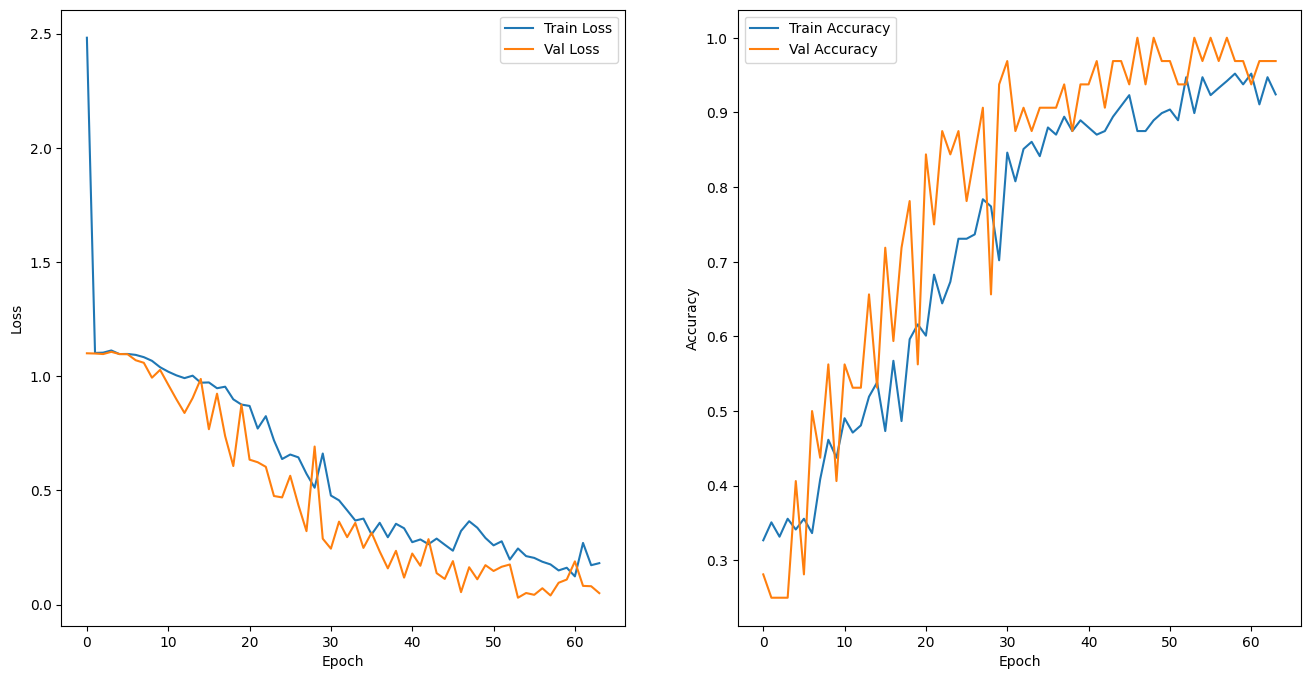

In [ ]:
plot_history(history)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential([
    Flatten(input_shape=(150, 150, 3)),  # 2D 이미지를 1D 벡터로 변환
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 67500)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               34560512  
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 34562051 (131.84 MB)
Trainable params: 34562051 (131.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=100,
    callbacks=[early_stopping]
)


Epoch 1/100
7/7 [==============================] - 3s 208ms/step - loss: 138.1546 - accuracy: 0.2902 - val_loss: 67.1991 - val_accuracy: 0.2188
Epoch 2/100
7/7 [==============================] - 1s 199ms/step - loss: 60.1259 - accuracy: 0.3510 - val_loss: 28.4811 - val_accuracy: 0.3750
Epoch 3/100
7/7 [==============================] - 2s 297ms/step - loss: 43.8287 - accuracy: 0.3259 - val_loss: 16.8113 - val_accuracy: 0.3438
Epoch 4/100
7/7 [==============================] - 2s 219ms/step - loss: 20.5388 - accuracy: 0.3438 - val_loss: 8.4027 - val_accuracy: 0.3125
Epoch 5/100
7/7 [==============================] - 2s 331ms/step - loss: 4.6155 - accuracy: 0.3365 - val_loss: 1.3277 - val_accuracy: 0.1875
Epoch 6/100
7/7 [==============================] - 1s 194ms/step - loss: 2.0154 - accuracy: 0.3558 - val_loss: 1.0989 - val_accuracy: 0.2500
Epoch 7/100
7/7 [==============================] - 1s 196ms/step - loss: 1.5160 - accuracy: 0.3413 - val_loss: 1.0986 - val_accuracy: 0.2812
Epoch

In [ ]:
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

1/1 [==============================] - 0s 114ms/step - loss: 1.0971 - accuracy: 0.3125
Validation Loss: 1.0970878601074219
Validation Accuracy: 0.3125


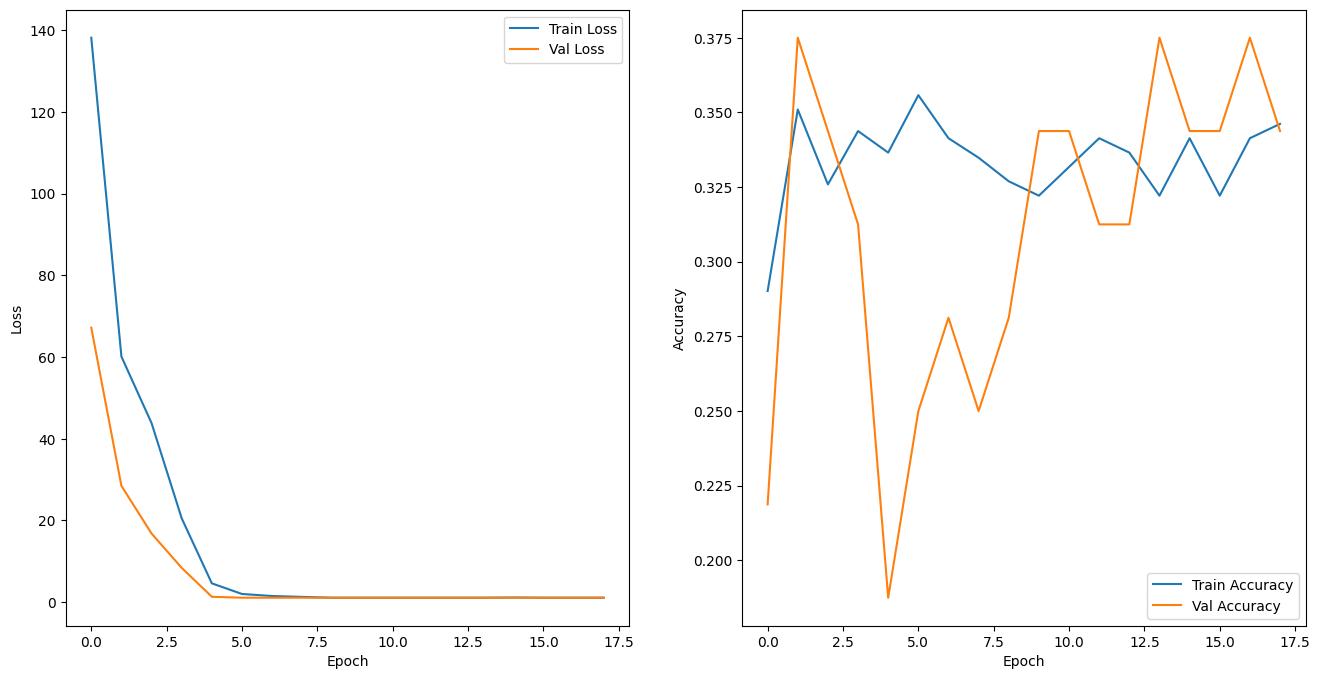

In [ ]:
plot_history(history)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()





Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=100,
    callbacks=[early_stopping]
)


Epoch 1/100
7/7 [==============================] - 3s 205ms/step - loss: 2.6604 - accuracy: 0.3413 - val_loss: 1.1032 - val_accuracy: 0.2812
Epoch 2/100
7/7 [==============================] - 1s 187ms/step - loss: 1.1181 - accuracy: 0.3365 - val_loss: 1.0840 - val_accuracy: 0.4375
Epoch 3/100
7/7 [==============================] - 1s 185ms/step - loss: 1.1055 - accuracy: 0.3839 - val_loss: 1.0946 - val_accuracy: 0.4062
Epoch 4/100
7/7 [==============================] - 1s 171ms/step - loss: 1.1018 - accuracy: 0.3269 - val_loss: 1.0974 - val_accuracy: 0.3438
Epoch 5/100
7/7 [==============================] - 2s 234ms/step - loss: 1.1006 - accuracy: 0.3317 - val_loss: 1.1010 - val_accuracy: 0.2188
Epoch 6/100
7/7 [==============================] - 2s 273ms/step - loss: 1.0974 - accuracy: 0.3606 - val_loss: 1.0960 - val_accuracy: 0.5000
Epoch 7/100
7/7 [==============================] - 1s 169ms/step - loss: 1.1011 - accuracy: 0.3510 - val_loss: 1.1182 - val_accuracy: 0.2188
Epoch 8/100
7

In [ ]:
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

1/1 [==============================] - 0s 59ms/step - loss: 0.1085 - accuracy: 0.9688
Validation Loss: 0.10846395790576935
Validation Accuracy: 0.96875


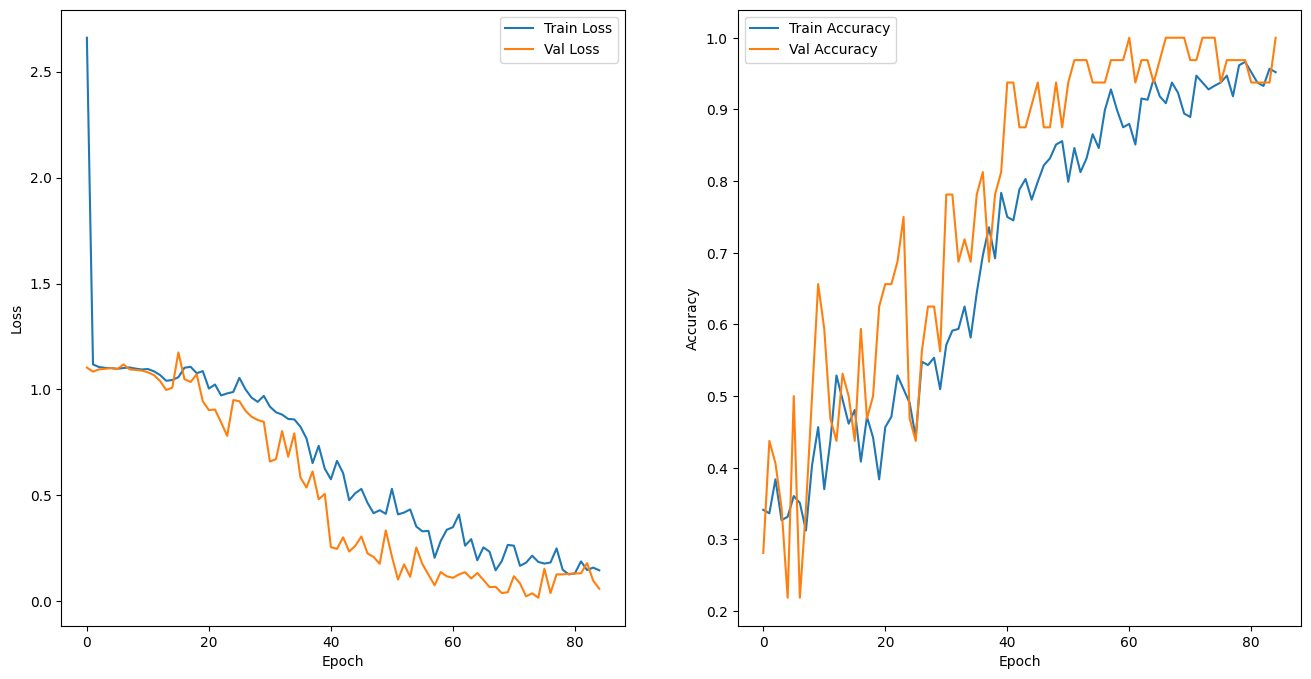

In [ ]:
plot_history(history)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

cifar100 = tf.keras.datasets.cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

# 데이터 전처리
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 레이블을 원-핫 인코딩으로 변환
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 100)
(10000, 32, 32, 3) (10000, 100)


In [ ]:
# 모델 구성
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # CIFAR-100 이미지의 크기
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(100, activation='softmax')  # CIFAR-100의 클래스 수
])


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 17, 17, 128)     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#  Early stopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               verbose=1,
                               restore_best_weights=True)

In [ ]:
# 모델 훈련
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)



Epoch 1/100
1563/1563 [==============================] - 12s 6ms/step - loss: 4.2563 - accuracy: 0.0361 - val_loss: 3.9653 - val_accuracy: 0.0764
Epoch 2/100
1563/1563 [==============================] - 10s 6ms/step - loss: 3.8278 - accuracy: 0.0986 - val_loss: 3.6230 - val_accuracy: 0.1356
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 3.5573 - accuracy: 0.1440 - val_loss: 3.3384 - val_accuracy: 0.1833
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 3.3708 - accuracy: 0.1815 - val_loss: 3.1652 - val_accuracy: 0.2211
Epoch 5/100
1563/1563 [==============================] - 10s 6ms/step - loss: 3.2157 - accuracy: 0.2133 - val_loss: 3.0750 - val_accuracy: 0.2464
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 3.1139 - accuracy: 0.2320 - val_loss: 2.9683 - val_accuracy: 0.2642
Epoch 7/100
1563/1563 [==============================] - 10s 6ms/step - loss: 3.0022 - accuracy: 0.2547 - val_loss: 2.9371 - v

In [ ]:
# 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 2.6830 - accuracy: 0.3320
Test Loss: 2.6829886436462402
Test Accuracy: 0.3319999873638153


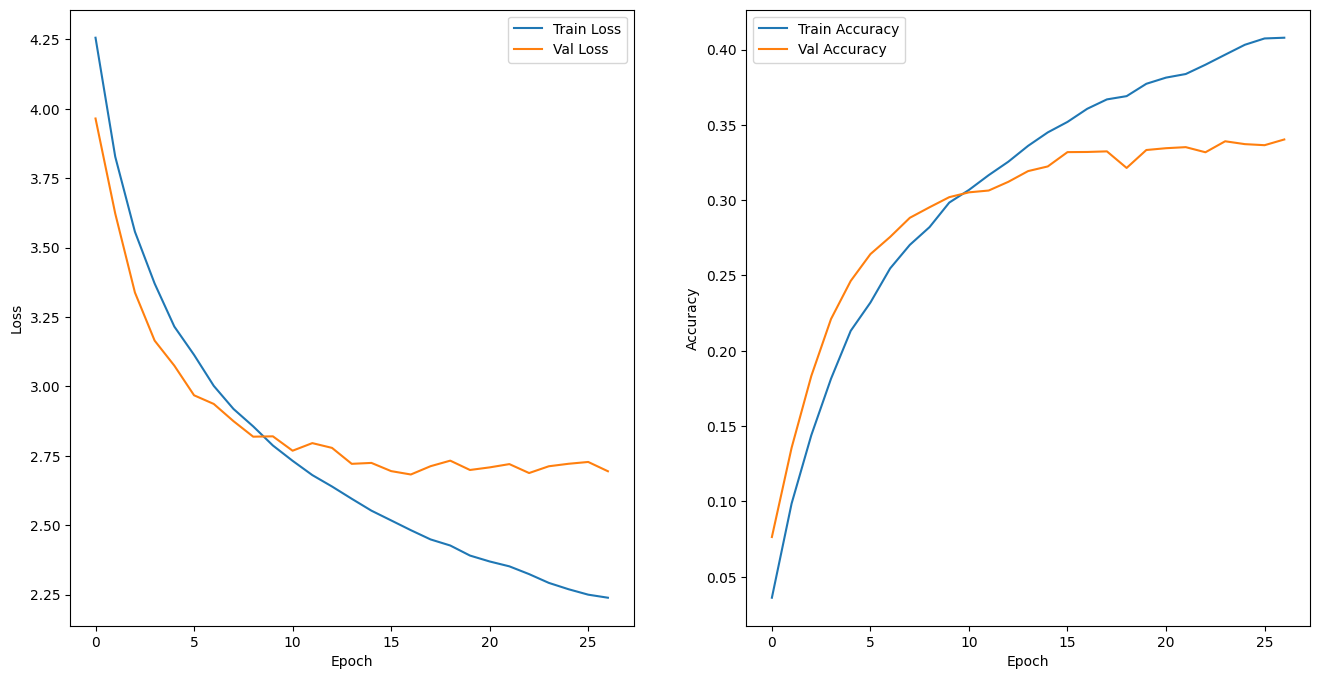

In [ ]:
plot_history(history)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(100, activation='softmax')  # CIFAR-100의 클래스 수
])
# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 2, 2, 128)       

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#  Early stopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               verbose=1,
                               restore_best_weights=True)

In [ ]:
# 모델 훈련
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)



Epoch 1/100
1563/1563 [==============================] - 13s 7ms/step - loss: 4.3471 - accuracy: 0.0262 - val_loss: 4.0949 - val_accuracy: 0.0494
Epoch 2/100
1563/1563 [==============================] - 10s 6ms/step - loss: 4.0204 - accuracy: 0.0645 - val_loss: 3.8722 - val_accuracy: 0.0915
Epoch 3/100
1563/1563 [==============================] - 10s 6ms/step - loss: 3.8111 - accuracy: 0.0996 - val_loss: 3.6504 - val_accuracy: 0.1319
Epoch 4/100
1563/1563 [==============================] - 10s 6ms/step - loss: 3.6495 - accuracy: 0.1267 - val_loss: 3.4863 - val_accuracy: 0.1647
Epoch 5/100
1563/1563 [==============================] - 10s 6ms/step - loss: 3.5183 - accuracy: 0.1490 - val_loss: 3.3626 - val_accuracy: 0.1879
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 3.4177 - accuracy: 0.1728 - val_loss: 3.2409 - val_accuracy: 0.2066
Epoch 7/100
1563/1563 [==============================] - 10s 6ms/step - loss: 3.3245 - accuracy: 0.1893 - val_loss: 3.2017 -

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

cifar100 = tf.keras.datasets.cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

# 데이터 전처리
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 레이블을 원-핫 인코딩으로 변환
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

169001437/169001437 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 100)
(10000, 32, 32, 3) (10000, 100)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#  Early stopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               verbose=1,
                               restore_best_weights=True)

In [ ]:
from keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

In [ ]:
# VGG16 모델 불러오기 (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 새로운 모델 정의
model = Sequential()
model.add(base_model)
model.add(Flatten())  # VGG16의 출력 평탄화
model.add(Dense(256, activation='relu'))  # 완전 연결 레이어 추가
model.add(Dense(100, activation='softmax'))

# 모델 컴파일
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 100)               25700     
                                                                 
Total params: 14871716 (56.73 MB)
Trainable params: 14871716 (56.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# 모델 훈련
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)




Epoch 1/100
1563/1563 [==============================] - 4850s 3s/step - loss: 4.3023 - accuracy: 0.0299 - val_loss: 4.1515 - val_accuracy: 0.0451
Epoch 2/100
 832/1563 [==============>...............] - ETA: 35:44 - loss: 4.0884 - accuracy: 0.0460

KeyboardInterrupt: 

In [23]:
!unzip -qq "/content/maskdetection.zip"

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time #모델 컴파일 시간 확인
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 데이터 경로
train_dir = '/content/face_maskdetection'

# 데이터 제너레이터 설정
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

#  Early stopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               verbose=1,
                               restore_best_weights=True)




In [31]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=100,
    callbacks=[early_stopping]
)


Epoch 1/100
34/34 [==============================] - 71s 2s/step - loss: 0.6662 - accuracy: 0.6876 - val_loss: 0.2046 - val_accuracy: 0.9219
Epoch 2/100
34/34 [==============================] - 64s 2s/step - loss: 0.1415 - accuracy: 0.9486 - val_loss: 0.1474 - val_accuracy: 0.9531
Epoch 3/100
34/34 [==============================] - 69s 2s/step - loss: 0.0866 - accuracy: 0.9794 - val_loss: 0.0772 - val_accuracy: 0.9727
Epoch 4/100
34/34 [==============================] - 67s 2s/step - loss: 0.0640 - accuracy: 0.9775 - val_loss: 0.0680 - val_accuracy: 0.9688
Epoch 5/100
34/34 [==============================] - 65s 2s/step - loss: 0.0369 - accuracy: 0.9878 - val_loss: 0.1080 - val_accuracy: 0.9727
Epoch 6/100
34/34 [==============================] - 66s 2s/step - loss: 0.0227 - accuracy: 0.9925 - val_loss: 0.0623 - val_accuracy: 0.9844
Epoch 7/100
34/34 [==============================] - 66s 2s/step - loss: 0.0173 - accuracy: 0.9935 - val_loss: 0.1405 - val_accuracy: 0.9648
Epoch 8/100
3

In [32]:
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


8/8 [==============================] - 4s 429ms/step - loss: 0.0740 - accuracy: 0.9805
Validation Loss: 0.07396005094051361
Validation Accuracy: 0.98046875


In [33]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize = (16,8))

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')
  plt.legend()

plt.show()

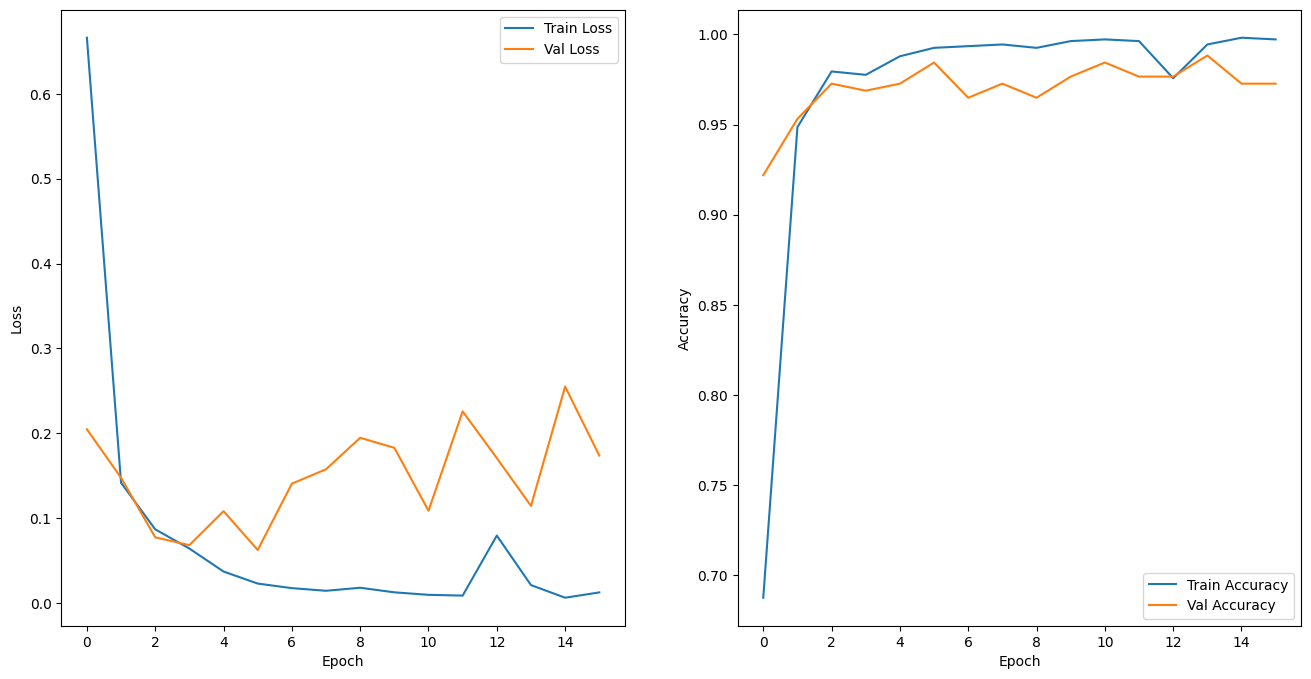

In [34]:
plot_history(history)

In [35]:
import os
import shutil
import numpy as np

def split_data(source_dir, train_dir, val_dir, test_dir, train_size=0.7, val_size=0.2, test_size=0.1):
    classes = os.listdir(source_dir)
    for cls in classes:
        cls_path = os.path.join(source_dir, cls)
        files = os.listdir(cls_path)
        np.random.shuffle(files)

        train_files = files[:int(len(files) * train_size)]
        val_files = files[int(len(files) * train_size):int(len(files) * (train_size + val_size))]
        test_files = files[int(len(files) * (train_size + val_size)):]

        os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
        os.makedirs(os.path.join(val_dir, cls), exist_ok=True)
        os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

        for file in train_files:
            shutil.copy(os.path.join(cls_path, file), os.path.join(train_dir, cls, file))

        for file in val_files:
            shutil.copy(os.path.join(cls_path, file), os.path.join(val_dir, cls, file))

        for file in test_files:
            shutil.copy(os.path.join(cls_path, file), os.path.join(test_dir, cls, file))

# 디렉터리 경로 설정
source_directory = '/content/face_maskdetection'
train_directory = '/content/face_maskdetection/train'
validation_directory = '/content/face_maskdetection/validation'
test_directory = '/content/face_maskdetection/test'

# 데이터 분할
split_data(source_directory, train_directory, validation_directory, test_directory)


In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 제너레이터 설정
datagen = ImageDataGenerator(rescale=1.0/255.0)

# 훈련 데이터 제너레이터
train_generator = datagen.flow_from_directory(
    train_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# 검증 데이터 제너레이터
validation_generator = datagen.flow_from_directory(
    validation_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# 테스트 데이터 제너레이터
test_generator = datagen.flow_from_directory(
    test_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 962 images belonging to 2 classes.
Found 275 images belonging to 2 classes.
Found 139 images belonging to 2 classes.


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

#  Early stopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               verbose=1,
                               restore_best_weights=True)




In [39]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=100,
    callbacks=[early_stopping]
)


Epoch 1/100
30/30 [==============================] - 63s 2s/step - loss: 0.5834 - accuracy: 0.7645 - val_loss: 0.2316 - val_accuracy: 0.9180
Epoch 2/100
30/30 [==============================] - 59s 2s/step - loss: 0.1093 - accuracy: 0.9624 - val_loss: 0.2730 - val_accuracy: 0.9023
Epoch 3/100
30/30 [==============================] - 59s 2s/step - loss: 0.1137 - accuracy: 0.9591 - val_loss: 0.2498 - val_accuracy: 0.9141
Epoch 4/100
30/30 [==============================] - 57s 2s/step - loss: 0.0648 - accuracy: 0.9817 - val_loss: 0.1168 - val_accuracy: 0.9648
Epoch 5/100
30/30 [==============================] - 60s 2s/step - loss: 0.0331 - accuracy: 0.9892 - val_loss: 0.1137 - val_accuracy: 0.9688
Epoch 6/100
30/30 [==============================] - 57s 2s/step - loss: 0.0242 - accuracy: 0.9968 - val_loss: 0.1125 - val_accuracy: 0.9766
Epoch 7/100
30/30 [==============================] - 57s 2s/step - loss: 0.0223 - accuracy: 0.9925 - val_loss: 0.1016 - val_accuracy: 0.9727
Epoch 8/100
3

In [40]:
# 모델 평가
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


4/4 [==============================] - 2s 424ms/step - loss: 0.0521 - accuracy: 0.9844
Test Loss: 0.05206594988703728
Test Accuracy: 0.984375


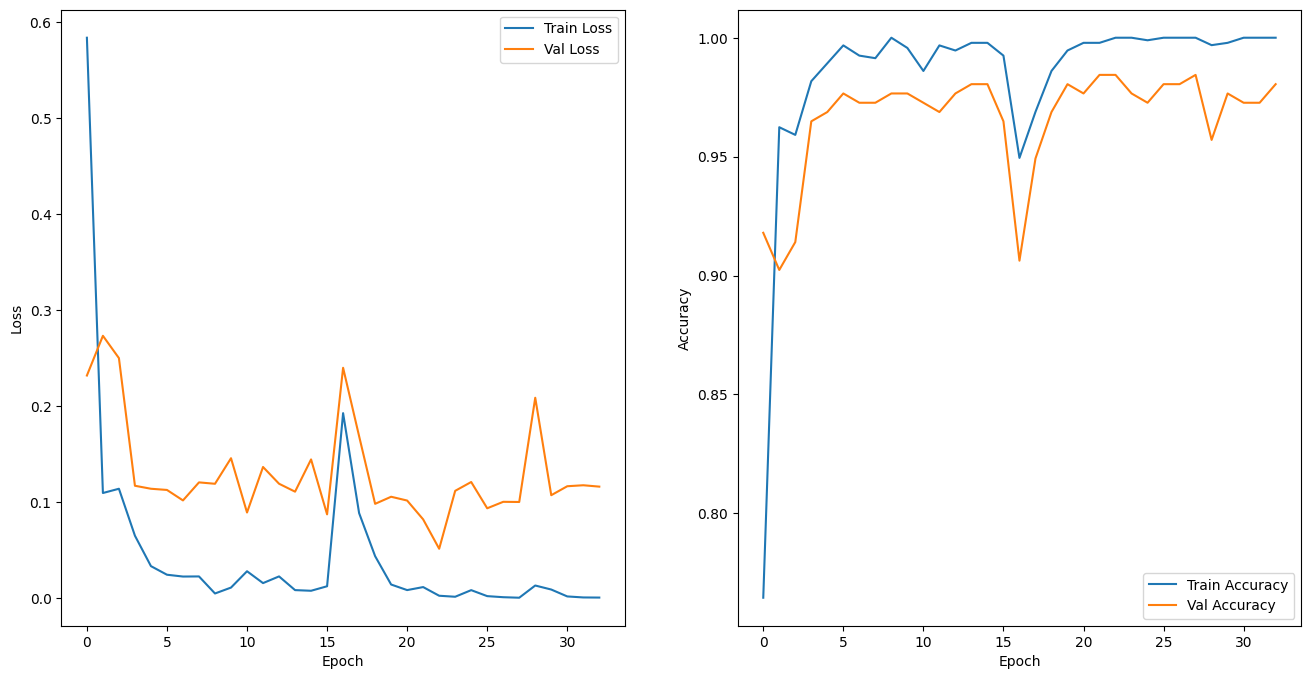

In [41]:
plot_history(history)